# MACHINE LEARNING AND ENGINEERING APPLICATIONS
<hr style="height:3px;border:none;color:stillblue;background-color:black;" />
### Technical PhD seminar series at Chair for Computer Aided Architectural Design (CAAD), ETH Zurich


[Vahid Moosavi](https://vahidmoosavi.com/)
<hr style="height:1px;border:none;color:stillblue;background-color:black;" />

<a></a>

# 5th Session 
<hr style="height:1px;border:none;color:stillblue;background-color:steelblue;" />
<span style="color:steelblue;font-size: 1em;"> 17th April 2018</span>


### Topics to be discussed 

* **Linear Transformations**
* **PCA**
* **PCA in comparison to SOM, K-Means**
* **Auto-Encoders**
* **Deep Auto-Encoders**


In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
pd.__version__
import sys
from scipy import stats
from ipywidgets import interact, HTML, FloatSlider

%matplotlib inline

## Some Basic notions in Linear Algebra

### A vector (or a point in n dimensional space)

In [2]:
x =  np.asarray([[2,2]])
x.shape

(1, 2)

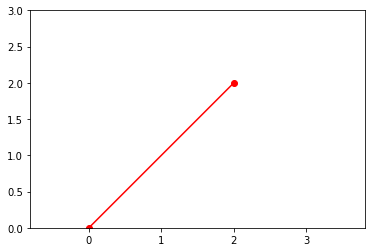

In [3]:
plt.plot([0,x[0,0]],[0,x[0,1]],'-or')
plt.axis('equal');
plt.xlim(0.0,3);
plt.ylim(0.0,3);


# Matrix Operation


### Matrices are acting as linear operator, moving every point from one location to another location


### We can write it like this too
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/7f32d668cc6edb290dc42e8e00db30dda68c1e29)

<a></a>



### Special Linear transformers
more examples: https://en.wikipedia.org/wiki/Linear_map#Examples_of_linear_transformation_matrices

In [4]:
#rotation 90 degrees
A =np.asarray([[0,-1],[1,0]])
print(np.matrix(A)) 
y = x.dot(A)
y.shape

[[ 0 -1]
 [ 1  0]]


(1, 2)

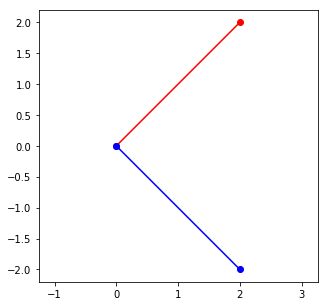

In [5]:
fig = plt.figure(figsize=(5,5))
plt.plot([0,x[0,0]],[0,x[0,1]],'-or')
plt.plot([0,y[0,0]],[0,y[0,1]],'-ob')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.axis('equal');

In [6]:
#rotation t degrees
t = np.pi/4.
A =np.asarray([[np.cos(t),-1*np.sin(t)],[np.sin(t),np.cos(t)]])

y = x.dot(A)
x.shape

(1, 2)

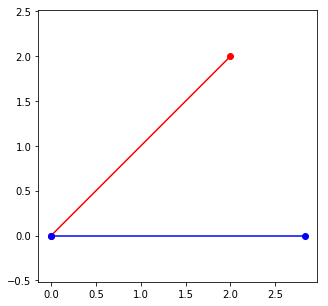

In [7]:
fig = plt.figure(figsize=(5,5))
plt.plot([0,x[0,0]],[0,x[0,1]],'-or')
plt.plot([0,y[0,0]],[0,y[0,1]],'-ob')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.axis('equal');

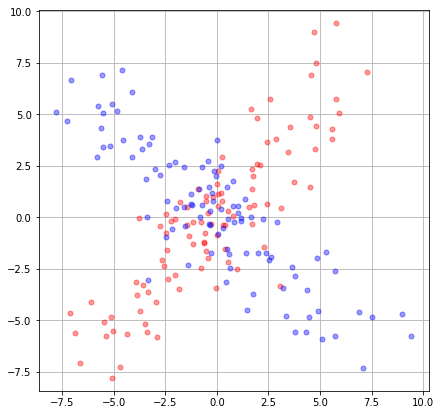

In [8]:
#rotation t degrees
t = 1*np.pi/2.
A =np.asarray([[np.cos(t),-1*np.sin(t)],[np.sin(t),np.cos(t)]])


N = 100
x1= np.random.uniform(low=0,high=10,size=N)[:,np.newaxis]
x1= np.random.normal(loc=0,scale=3,size=N)[:,np.newaxis]
x2 = 1*x1 + np.random.normal(loc=0.0, scale=1.7, size=N)[:,np.newaxis]

X = np.concatenate((x1,x2),axis=1)

Y = X.dot(A)

fig = plt.figure(figsize=(7,7))
ax1= plt.subplot(111)
plt.plot(X[:,0],X[:,1],'.r',markersize=10,alpha=.4 );


ax1= plt.subplot(111)
plt.plot(Y[:,0],Y[:,1],'.b',markersize=10,alpha=.4 );


plt.grid();
plt.axis('equal');



# Let's go back to Data Driven models and Machine Learning

### where we are interested to find certain matrices
### While in the previous examples, we have a matrix and then, want to see how the system will behave.

### But in machine learning we are usually interested in designing or learning certain operators

## Principal component analysis (PCA)
### Comes with many different names in different fileds
* **https://en.wikipedia.org/wiki/Principal_component_analysis**

## The basic idea: 
### we have observed  $ x $ 
## Is it possible to to find a transformation, where in the new space the new dimensions are uncorrelated? 


##  $$x = \sum_{i = 1}^n a_i. p_i$$

## $p_i$ is an n dimensional column vector. 

### all the $p_i$ are independent to each other!

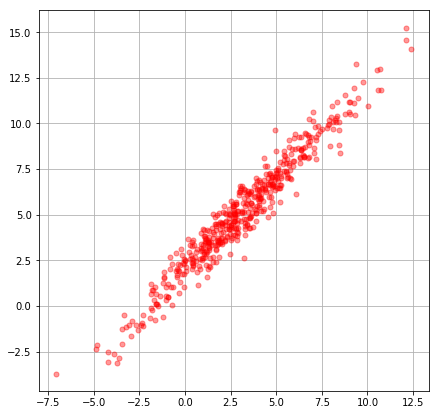

In [9]:
N = 500
x1= np.random.uniform(low=0,high=10,size=N)[:,np.newaxis]
x1= np.random.normal(loc=3,scale=3,size=N)[:,np.newaxis]
x2 = 1*x1 + np.random.normal(loc=2.0, scale=0.7, size=N)[:,np.newaxis]

X = np.concatenate((x1,x2),axis=1)



fig = plt.figure(figsize=(7,7))
ax1= plt.subplot(111)
plt.plot(X[:,0],X[:,1],'.r',markersize=10,alpha=.4 );
plt.grid();
plt.axis('equal');

## PC transformation is to fit an ellipsoid to the data, where the lenght of each axis of the ellipsoid is equal to the variation in that direction

# How to find PCs?
## There are many ways, but the most common one is through eigenvalue decomposition
### The prefix eigen- is adopted from the German word eigen for "proper", "characteristic"
### In that sense PCA is a part of "Matrix Decomposition" field
* **https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors#Eigenvalues_and_eigenvectors_of_matrices**


### The eigen vectors of covariance matrix are PCA

## Covariance and Correlation
https://en.wikipedia.org/wiki/Covariance

In [10]:

print ('Covariance')
print (np.cov(X.T))
print ('\n')
print ('Correlation')
print (np.corrcoef(X.T))

Covariance
[[9.26246459 9.25776508]
 [9.25776508 9.76798844]]


Correlation
[[1.         0.97328562]
 [0.97328562 1.        ]]


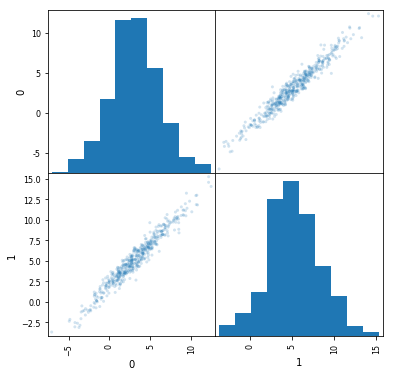

In [11]:
# look how dependent are the two original dimensions 
# X_trans = X.dot(PCs[:,:5])
DF = pd.DataFrame(data=X)
from pandas.tools.plotting import scatter_matrix
scatter_matrix(DF, alpha=0.2, figsize=(6, 6), diagonal='hist');

## How to estimate the covariance matrix?

In [12]:
# Normalizing it around 0
X_w = X-np.mean(X,axis=0)

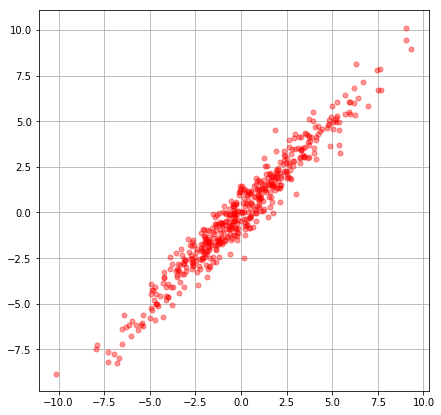

In [13]:
fig = plt.figure(figsize=(7,7))
ax1= plt.subplot(111)
plt.plot(X_w[:,0],X_w[:,1],'.r',markersize=10,alpha=.4 );
plt.grid();
plt.axis('equal');

In [14]:
# We estimate the Covariance matrix as below:
XTX = X_w.T.dot(X_w)/(X_w.shape[0]-1)
np.around(XTX,decimals=3)

array([[9.262, 9.258],
       [9.258, 9.768]])

In [54]:
## Using numpy on X
COVX = np.cov(X.T)
np.around(COVX,decimals=3)

array([[9.114, 9.144],
       [9.144, 9.6  ]])

## Singular Value Decomposition
#### If we calculate the eigenvectors of the covariance matrix, they are the requested operator in PCA
* **https://en.wikipedia.org/wiki/Principal_component_analysis#Singular_value_decomposition**

In [15]:
VARs,PCs = np.linalg.eig(XTX)
# VARs,PCs = np.linalg.eig(np.cov(X.T))
indsort = np.argsort(VARs*-1,)
PCs = PCs[:,indsort]
VARs = VARs[indsort]

# we need to normalize the vars
VARs = VARs/np.sum(VARs)
print (np.sum(VARs))

1.0


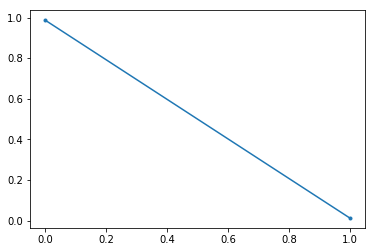

In [16]:
plt.plot(VARs,'.-')

In [17]:
PCs

array([[-0.69739066, -0.71669119],
       [-0.71669119,  0.69739066]])

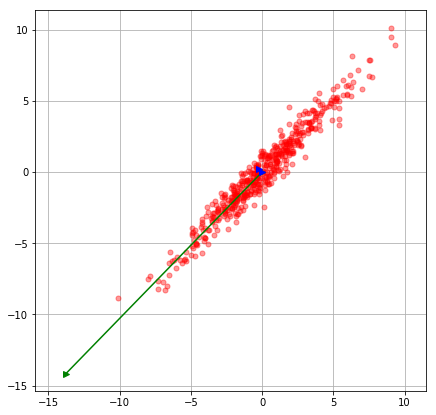

In [18]:
fig = plt.figure(figsize=(7,7))
ax1= plt.subplot(111)
plt.plot(X_w[:,0],X_w[:,1],'.r',markersize=10,alpha=.4 );
plt.plot([0,PCs[0,0]*VARs[0]*20],[0,PCs[1,0]*VARs[0]*20],'->g')
plt.plot([0,PCs[0,1]*VARs[1]*20],[0,PCs[1,1]*VARs[1]*20],'->b')
plt.grid();
plt.axis('equal');

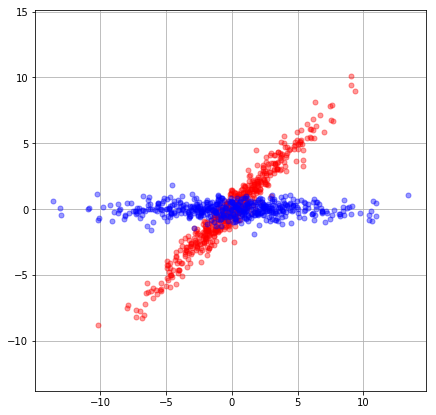

In [19]:
fig = plt.figure(figsize=(7,7))

## Now we can transform the data
X_trans = X_w.dot(PCs[:])
plt.plot(X_w[:,0],X_w[:,1],'.r',markersize=10,alpha=.4 );
plt.plot(X_trans[:,0],X_trans[:,1],'.b',markersize=10,alpha=.4 );
plt.grid();
plt.axis('equal');

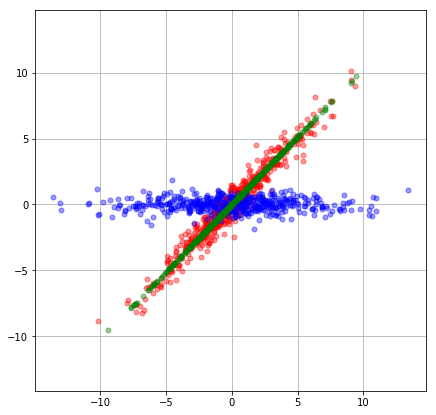

In [21]:

fig = plt.figure(figsize=(7,7))



X_trans = X_w.dot(PCs[:])


plt.plot(X_w[:,0],X_w[:,1],'.r',markersize=10,alpha=.4 );
plt.plot(X_trans[:,0],X_trans[:,1],'.b',markersize=10,alpha=.4 );


# Parametric transformation (back and forth)
X_ =   X_trans.dot(([1,0.05]*PCs).T)

plt.plot(X_ [:,0],X_ [:,1],'.g',markersize=10,alpha=.4 );

plt.grid();
plt.axis('equal');

### Now testing the original idea of PCA
### The new bases should be uncorrelated

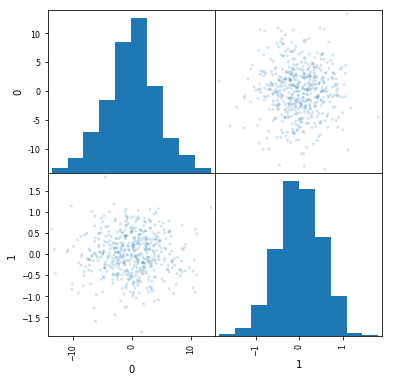

In [23]:
# look how uncorrelated they are 
X_trans = X_w.dot(PCs)
DF = pd.DataFrame(data=X_trans)
from pandas.tools.plotting import scatter_matrix
scatter_matrix(DF, alpha=0.2, figsize=(6, 6), diagonal='hist');

In [24]:
# This shows the orthogonality
np.around(np.cov(X_trans.T),decimals=2)

array([[18.78,  0.  ],
       [ 0.  ,  0.25]])

# What is this good for?
### Dimensionality reduction and feature extraction -- > To reduce the curse of dimensionality for prediction problems (Very classic)
### Data Compression
### Generative space

# Data Compression

#### Let's imagine an image is a matrix, where each row is a vector

In [94]:
def PCA_np(Y):
    Y_mean = np.mean(Y,axis=0)
    Y = Y - Y_mean 
    # local centering
#     Y -= Y.mean(axis=1).reshape(Y.shape[0], -1)

    YTY = Y.T.dot(Y)
    
    VARs,PCs = np.linalg.eig(YTY)
    VARs = np.real(VARs)
    PCs = np.real(PCs)
    indsort = np.argsort(VARs*-1,)
    PCs = PCs[:,indsort]
    VARs = VARs[indsort]
    VARs = VARs/np.sum(VARs)
    return PCs,VARs

(757, 523, 3)
We take one image as one matrix.
Number of dimensions: 523


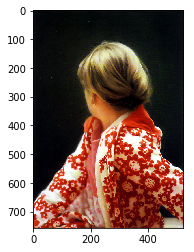

In [95]:
# Image compression
# 
img = plt.imread('./Data/richter_betty.png')
plt.imshow(img)
print (img.shape)
print ('We take one image as one matrix.')
print ('Number of dimensions: {}'.format(img.shape[1]))
R = img[:,:,0]
G = img[:,:,1]
B = img[:,:,2]


PCs_R,VARs_R = PCA_np(R)
PCs_G,VARs_G = PCA_np(G)
PCs_B,VARs_B = PCA_np(B)

In [97]:
def recon_(n_comps=1):
    fig = plt.figure(figsize=(7,7))
    R_tran= R.dot(PCs_R[:,:n_comps])
    G_tran= G.dot(PCs_G[:,:n_comps])
    B_tran= B.dot(PCs_B[:,:n_comps])
    
    
    R_= R_tran.dot(PCs_R[:,:n_comps].T)
    G_= G_tran.dot(PCs_G[:,:n_comps].T)
    B_= B_tran.dot(PCs_B[:,:n_comps].T)
    
    
    mn = np.min(R_)
    mx = np.max(R_)
    R_ = (R_-mn)/(mx-mn)
    
    
    mn = np.min(G_)
    mx = np.max(G_)
    G_ = (G_-mn)/(mx-mn)
    
    mn = np.min(B_)
    mx = np.max(B_)
    B_ = (B_-mn)/(mx-mn)
    
    img_rec = np.concatenate((R_[:,:,np.newaxis],G_[:,:,np.newaxis],B_[:,:,np.newaxis]),axis=2)
    plt.imshow(img_rec)


interact(recon_, n_comps=(0,100,1))


interactive(children=(IntSlider(value=1, description='n_comps'), Output()), _dom_classes=('widget-interact',))

<function __main__.recon_>

In [58]:
# Just for visulization of nn architecture
#Taken from: https://gist.github.com/craffel/2d727968c3aaebd10359
def draw_neural_net(ax, left, right, bottom, top, layer_sizes,random_edge='No',lateral_connection='No'):
    '''
    Draw a neural network cartoon using matplotilb.
    
    :usage:
        >>> fig = plt.figure(figsize=(12, 12))
        >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])
    
    :parameters:
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
    '''
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    print (v_spacing/4)
    radius = np.min([v_spacing/4,.03])
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), radius,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
        
            if n==0:
                if m<5:
                    ax.text(n*h_spacing + .9*left, layer_top - m*v_spacing,'$x_{}$'.format(m) , fontsize=10,zorder=10)
            elif n==(len(layer_sizes)-1):
                if m<5:
                    ax.text(n*h_spacing + .9*left, layer_top - m*v_spacing,'$y_{}$'.format(m) , fontsize=10,zorder=10)
            else:
                if m<5:
                    ax.text(n*h_spacing + .9*left, layer_top - m*v_spacing,'$f_{}$'.format(m) , fontsize=10,zorder=10)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                if random_edge =='Yes':
                    if np.random.rand()>0.3:
                        line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                      [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='gray')
                        x = n*h_spacing + left
                        y = layer_top_a - m*v_spacing
                        dx = (n + 1)*h_spacing + left - x - 1.3*radius
                        dy = layer_top_b - o*v_spacing -y 
                        line = plt.arrow(x,y,dx,dy, color='gray',head_width=.01,head_length=.01)
                        ax.add_artist(line)  
                else:
                    line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                      [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='gray')
                    x = n*h_spacing + left
                    y = layer_top_a - m*v_spacing
                    dx = (n + 1)*h_spacing + left - x - 1.3*radius
                    dy = layer_top_b - o*v_spacing -y 
                    line = plt.arrow(x,y,dx,dy, color='gray',head_width=.01,head_length=.01)
                    ax.add_artist(line)  

# Over complete representations
## What if we relax the assumptin of orthonormality

## And as we discussed before, K-means is a kind of transformation
## Then, each cluster center is pointing toward a dimensionality

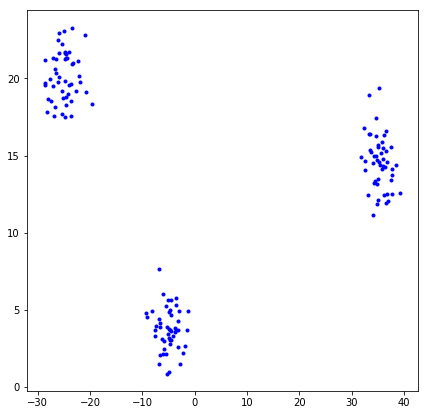

In [101]:
# A two dimensional example
fig = plt.figure()

N = 50

d3 = 1.6*np.random.randn(N,2)
d3[:,0]= d3[:,0] - 5
d3[:,1]= d3[:,1] + 4
plt.plot(d3[:,0],d3[:,1],'.b')


d4 = 1.8*np.random.randn(N,2)
d4[:,0]= d4[:,0] - 25
d4[:,1]= d4[:,1] + 20
plt.plot(d4[:,0],d4[:,1],'.b')


d5 = 1.8*np.random.randn(N,2)
d5[:,0]= d5[:,0] + 35
d5[:,1]= d5[:,1] + 14
plt.plot(d5[:,0],d5[:,1],'.b')
Data1 = np.concatenate((d3,d4,d5))
fig.set_size_inches(7,7)

# If each PC is a new dimensionality

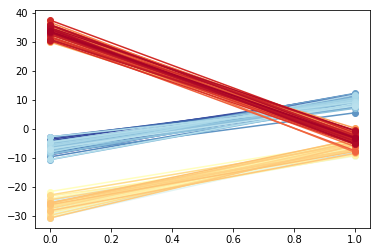

In [104]:
from sklearn.decomposition import PCA
X = np.concatenate((d3,d4,d5))
X = X-np.mean(X,axis=0)
pca = PCA()
X_tr_pca = pca.fit_transform(X)
X_tr_pca.shape

for i in range(X_tr_pca.shape[0]):
    plt.plot(X_tr_pca[i],'-o',color=plt.cm.RdYlBu_r(float(i)/X_tr_pca.shape[0]));
 



# Clustering as grouping
# A typical way of thinking about Clustering (e.g K-Means)

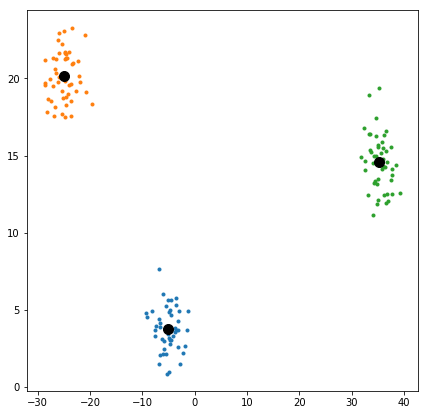

In [105]:
# A two dimensional example
fig = plt.figure()

plt.plot(d3[:,0],d3[:,1],'.')
plt.plot(d4[:,0],d4[:,1],'.')
plt.plot(d5[:,0],d5[:,1],'.')


mu3= d3.mean(axis=0)[np.newaxis,:]
mu4= d4.mean(axis=0)[np.newaxis,:]
mu5= d5.mean(axis=0)[np.newaxis,:]
mus = np.concatenate((mu3,mu4,mu5),axis=0)

plt.plot(mus[:,0],mus[:,1],'ok',markersize=10)

fig.set_size_inches(7,7)

# If the loss function is this:
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/debd28209802c22a6e6a1d74d099f728e6bd17a4" width =300, height=300/>


# If we assume the output of the network is a binary vector, with the dimention K

0.04


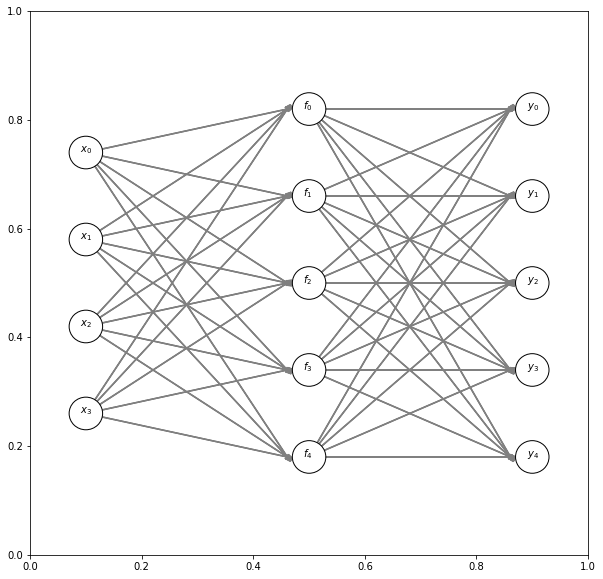

In [59]:
fig = plt.figure(figsize=(10, 10))
draw_neural_net(fig.gca(), .1, .9, .1, .9, [4,5,5],random_edge='No')

# Therefore, each cluster is a dimensionality (i.e. pointing toward a certain direction)

## If we calculate the dot product between each data point and cluster centers, we get new representation

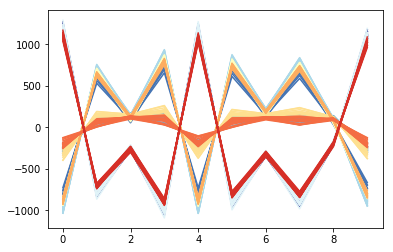

In [106]:
# If we increase the the number of clusters
from sklearn.cluster import KMeans
n_clusters = 10
X = np.concatenate((d3,d4,d5))
X = X-np.mean(X,axis=0)
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
kmeans.cluster_centers_.shape

X_transformed_kmeans = X.dot(kmeans.cluster_centers_.T)
X_transformed_kmeans.shape
cluster_inds = kmeans.predict(X)
for i in range(n_clusters):
#     plt.plot(X_transformed_kmeans[cluster_inds==i].T,'C{}'.format(i));
    plt.plot(X_transformed_kmeans[cluster_inds==i].T,'-',color=plt.cm.RdYlBu_r(float(i)/n_clusters));

In [108]:
import sompylib.sompy as SOM

msz0 = 10
msz1 = 10
X = np.concatenate((d3,d4,d5))
X = X-np.mean(X,axis=0)
somToy = SOM.SOM('som1', X, mapsize = [msz0, msz1],norm_method = 'var',initmethod='pca')
# som1 = SOM.SOM('som1', D, mapsize = [1, 100],norm_method = 'var',initmethod='pca')
somToy.train(n_job = 1, shared_memory = 'no',verbose='final')
codebook_Toy = somToy.codebook[:]
codebook_Toy_n = SOM.denormalize_by(somToy.data_raw, codebook_Toy, n_method = 'var')



Total time elapsed: 0.041000 secodns
final quantization error: 0.046154


(150, 100)

# Each node of the trained SOM is a dimensionality

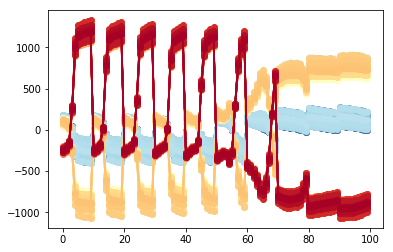

In [110]:

X_transformed_SOM= X.dot(codebook_Toy_n.T)
X_transformed_SOM.shape
for i in range(X_transformed_SOM.shape[0]):
    plt.plot(X_transformed_SOM[i],'-o',color=plt.cm.RdYlBu_r(float(i)/X_tr_pca.shape[0]));
 




# Distributed Representation
# But there is a fundamental difference between K-meas,SOM and PCA

In [111]:
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data

"""Test the autoencoder using MNIST."""
# %%
# load MNIST as before
mnist_AE = input_data.read_data_sets('MNIST_data', one_hot=True)
mean_img = np.mean(mnist_AE.train.images, axis=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [112]:
import random
test_xs = mnist_AE.test.images
test_xs_labels= mnist_AE.test.labels
train_xs_labels= mnist_AE.train.labels

train_xs = mnist_AE.train.images
train_xs_norm = np.array([img - mean_img for img in train_xs])
test_xs_norm = np.array([img - mean_img for img in test_xs])
import random
ind_row_test = random.sample(range(test_xs.shape[0]),2000)
ind_row_train = random.sample(range(train_xs.shape[0]),1000)

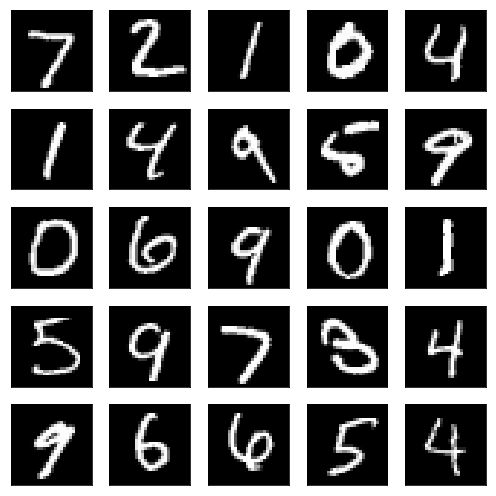

In [113]:
fig = plt.figure(figsize=(7,7))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(test_xs[i].reshape(28,28),cmap=plt.cm.gray);
    plt.xticks([]);
    plt.yticks([]);
plt.tight_layout()

# Cnetralized Reperesentation in manifold learning methods


In [65]:
import sompylib.sompy as SOM

msz0 = 30
msz1 = 30
X = test_xs[:].astype(float) + np.random.randn(test_xs_norm[:].shape[0],test_xs_norm[:].shape[1])*1e-5
somMNIST = SOM.SOM('som1', X, mapsize = [msz0, msz1],norm_method = 'var',initmethod='pca')
# som1 = SOM.SOM('som1', D, mapsize = [1, 100],norm_method = 'var',initmethod='pca')
somMNIST.train(n_job = 1, shared_memory = 'no',verbose='final')
codebook_MNIST = somMNIST.codebook[:]
codebook_MNIST_n = SOM.denormalize_by(somMNIST.data_raw, codebook_MNIST, n_method = 'var')

Total time elapsed: 1.992000 secodns
final quantization error: 19.890065


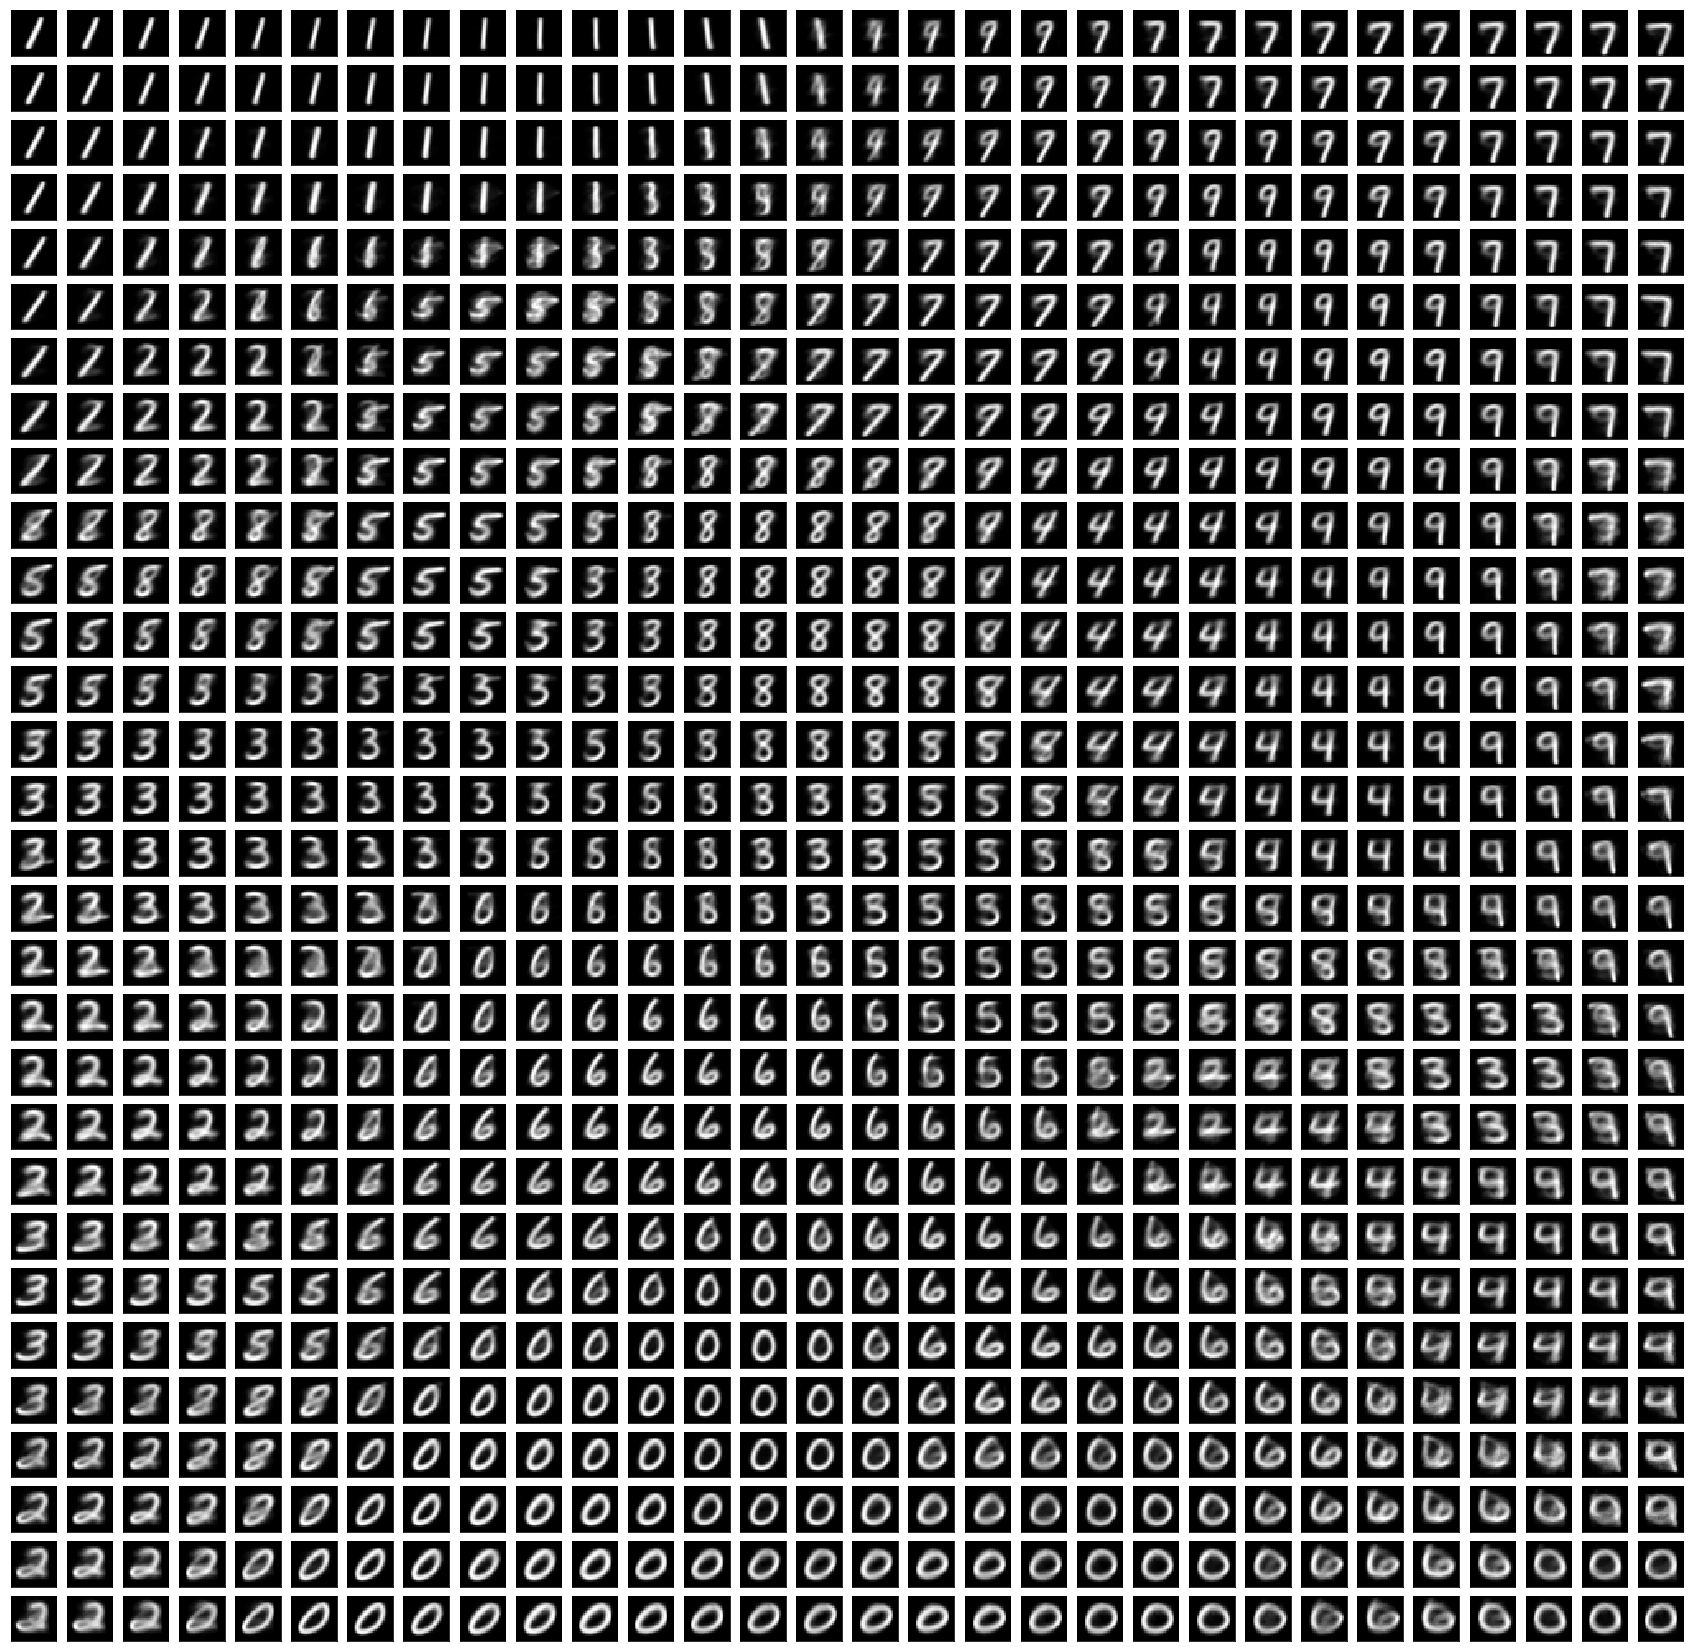

In [66]:
c = 0;
fig = plt.figure(figsize=(30,30))
for i in range(msz0):
    for j in range(msz1):
        plt.subplot(msz0,msz1,c+1);
        plt.imshow(codebook_MNIST_n[c].reshape(28,28),cmap='gray')
        c = c +1
        plt.xticks([])
        plt.yticks([])


## PCA as a linear transformation, where we change the representation to a new orthogonal representation

In [67]:
def PCA_np(Y):
    Y_mean = np.mean(Y,axis=0)
    Y = Y - Y_mean 
    # local centering
#     Y -= Y.mean(axis=1).reshape(Y.shape[0], -1)

    YTY = Y.T.dot(Y)
    
    VARs,PCs = np.linalg.eig(YTY)
    VARs = np.real(VARs)
    PCs = np.real(PCs)
    indsort = np.argsort(VARs*-1,)
    PCs = PCs[:,indsort]
    VARs = VARs[indsort]
    VARs = VARs/np.sum(VARs)
    return PCs,VARs
PCs,VARs = PCA_np(test_xs[ind_row_test])

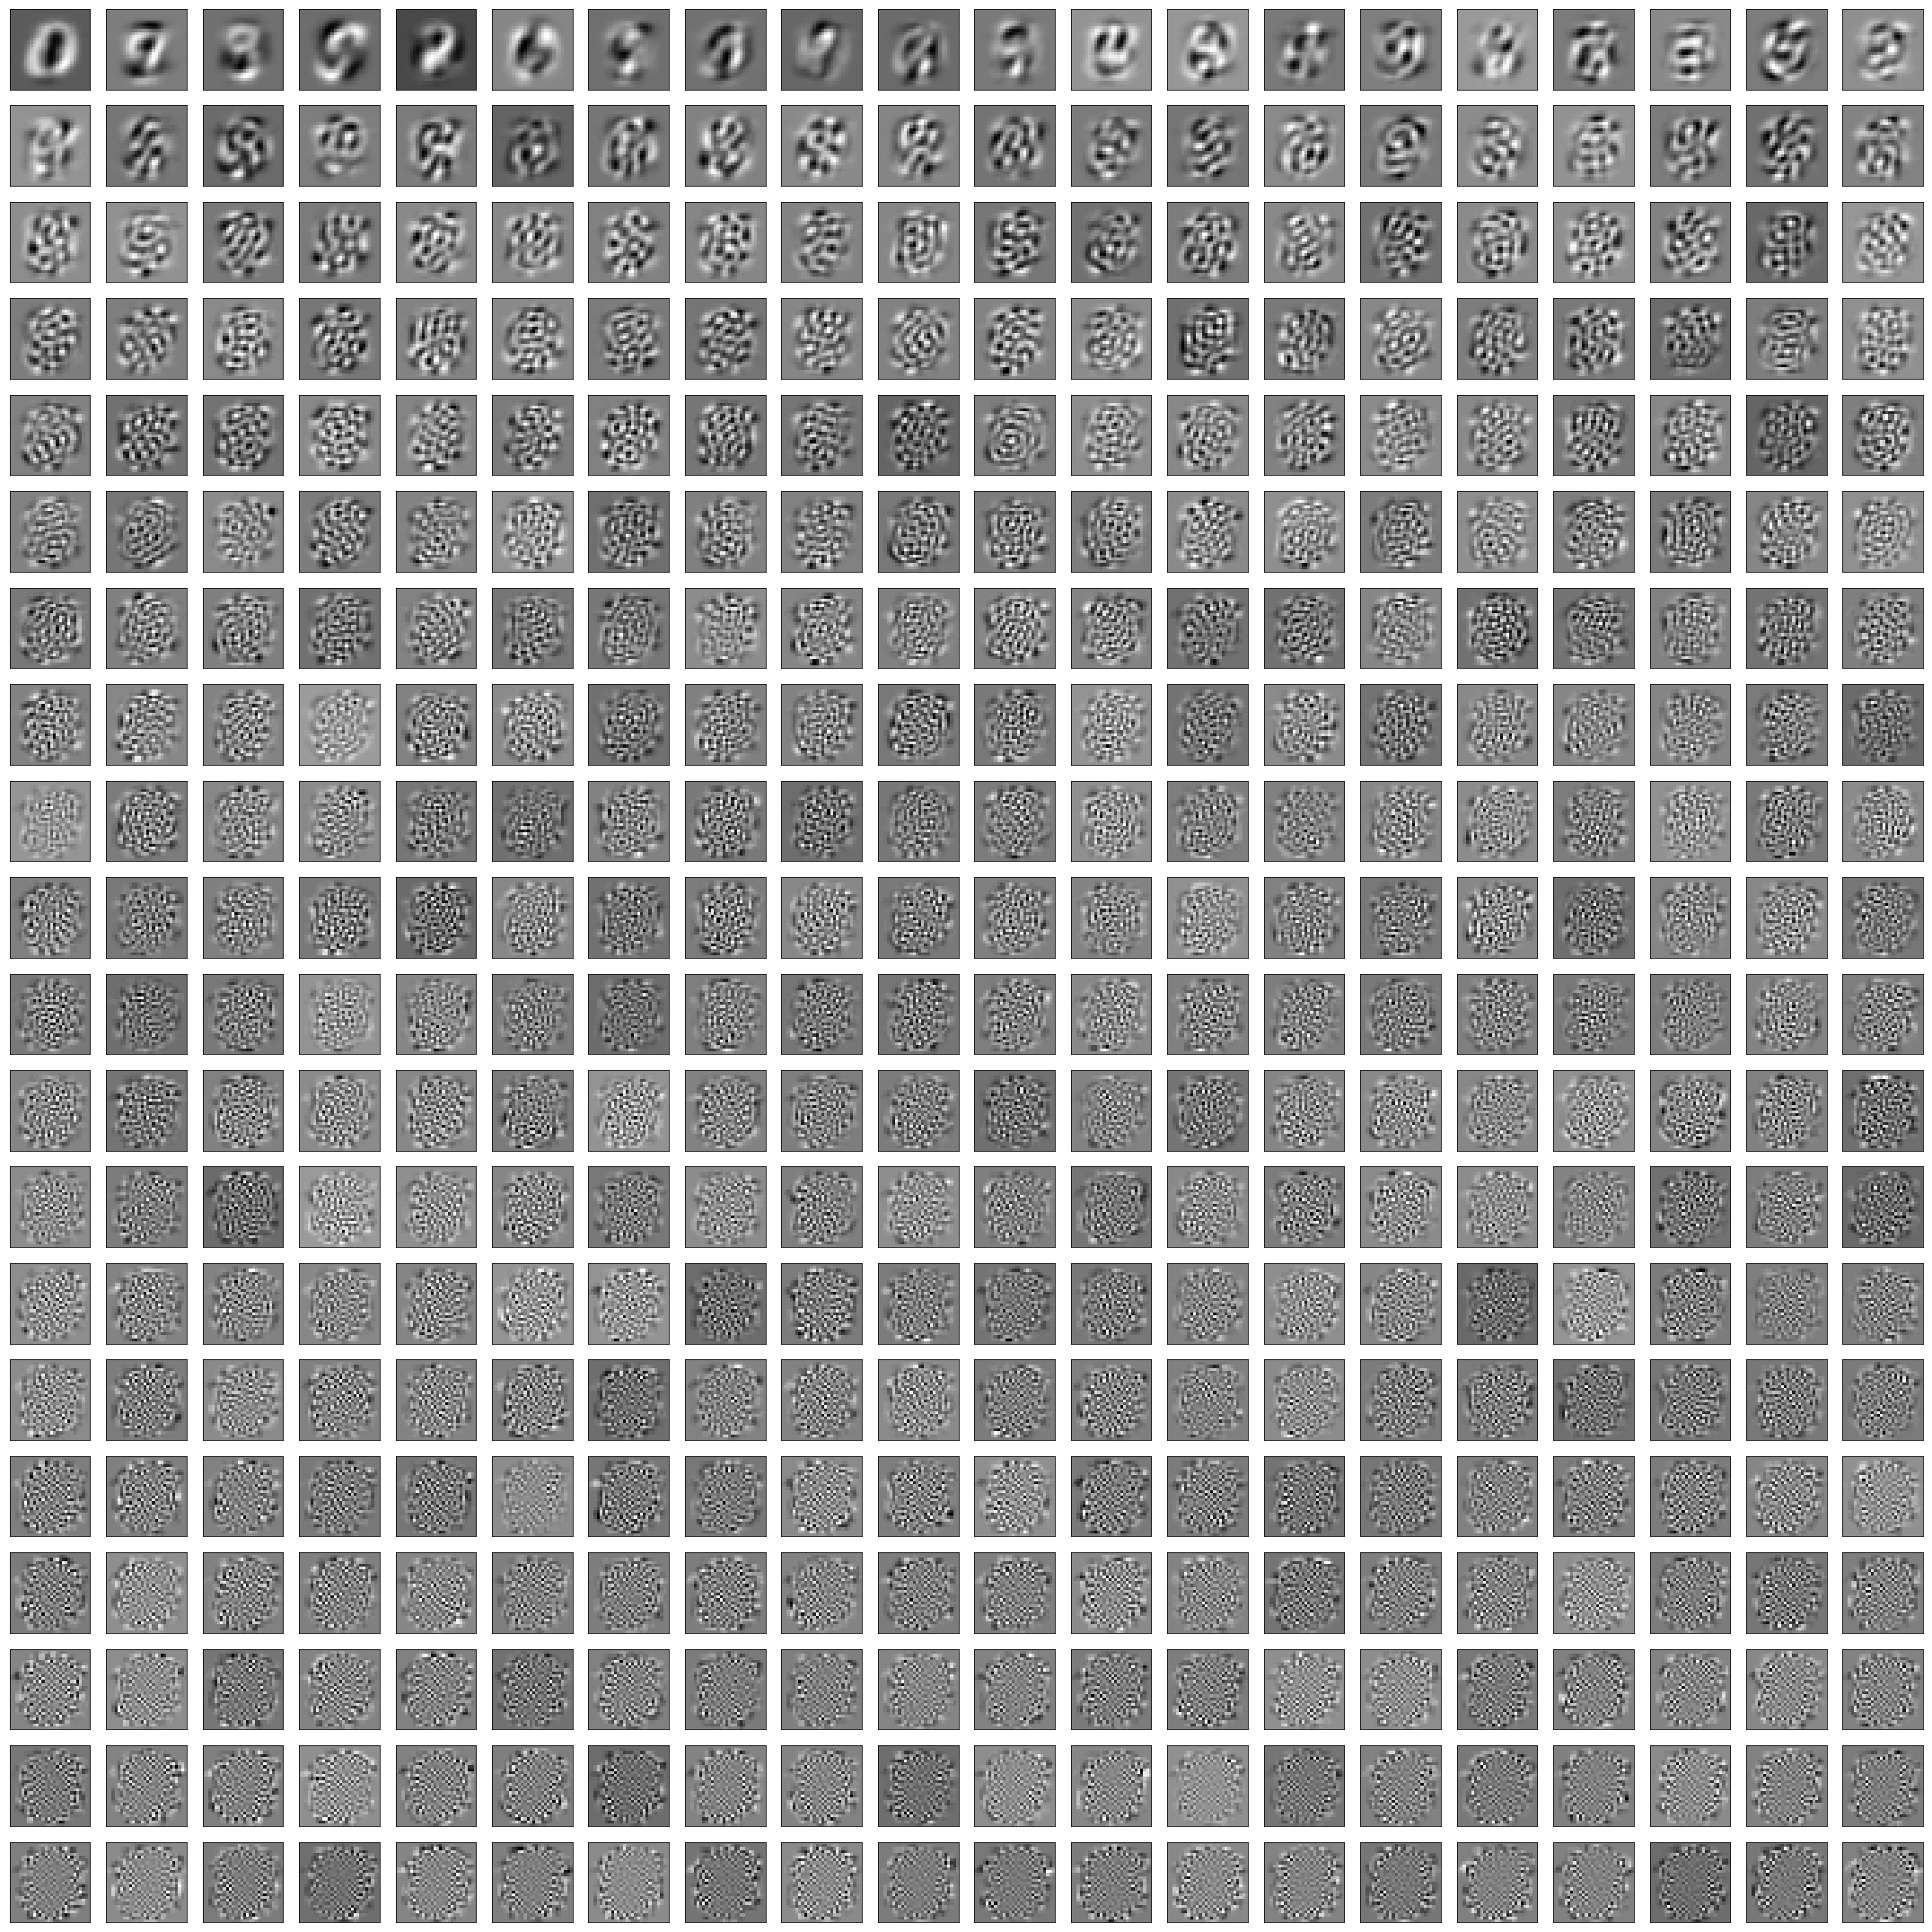

In [68]:
fig = plt.figure(figsize=(30,30))
for i in range(400):
    plt.subplot(20,20,i+1)
    #We have 784 PCs
    plt.imshow(PCs[:,0+i].reshape(28,28),cmap=plt.cm.gray);
    plt.xticks([]);
    plt.yticks([]);
plt.tight_layout()

# Decentralized representation in PCA

# We will see that in deep networks this is an important factor

# Encoder-Decoder Networks
### What is happening in compression example, can be seen as two steps of encoding and decoding

## First part is an encoder
## Second part is a decoder



# Encoder-Decoder Framework

0.02


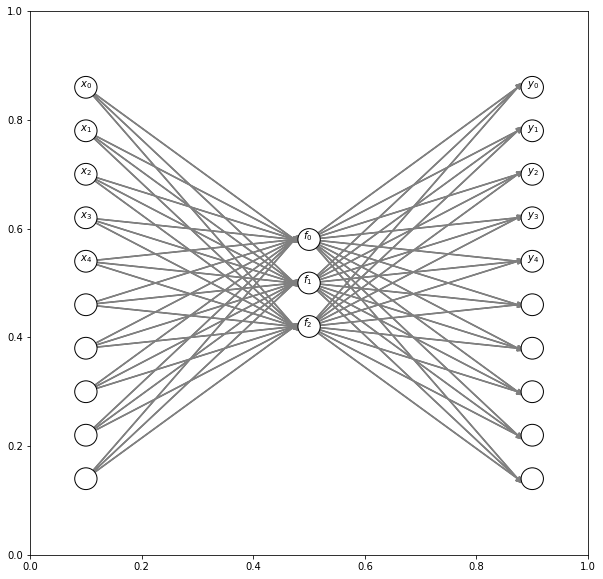

In [114]:
fig = plt.figure(figsize=(10, 10))
draw_neural_net(fig.gca(), .1, .9, .1, .9, [10,3,10],)

In [116]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(test_xs_norm)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

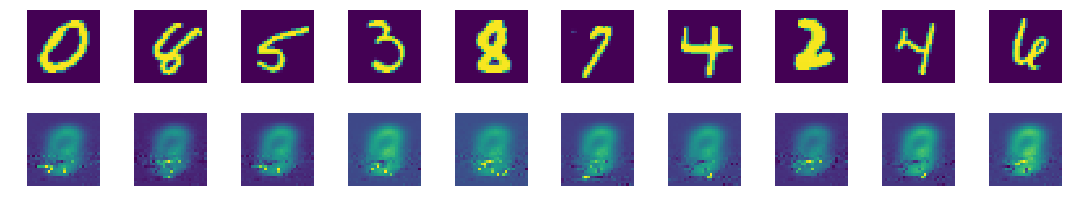

In [120]:
def viz_reconstuct(n_comps=100):
    W_pca = pca.components_
    sel_comp = n_comps
    lowdim_PCA = test_xs_norm.dot(W_pca[:,:sel_comp])
    lowdim_PCA.shape
    recon_PCA = lowdim_PCA.dot(W_pca[:,:sel_comp].T)+ mean_img
    n_examples = 10
    fig, axs = plt.subplots(2, n_examples, figsize=(15, 3))
    for example_i,ind in enumerate(ind_row_test[:n_examples]):
        axs[0][example_i].imshow(
            np.reshape(test_xs[ind, :], (28, 28)))
        axs[0][example_i].set_axis_off()
        axs[1][example_i].imshow(
                np.reshape([recon_PCA[ind, :]], (28, 28)))
        axs[1][example_i].set_axis_off()

    fig.show()
    plt.tight_layout()    
viz_reconstuct(n_comps=64)


# In the language of classical ML:
## 1- The PCs are orthogonal
## 2- They have the same dimentions as the the data
## 3- And they are linear transformation



# How to relax this assumptions?
<hr style="height:3px;border:none;color:stillblue;background-color:steelblue;" />


<hr style="height:3px;border:none;color:stillblue;background-color:steelblue;" />

# Deep Auto-Encoders
## 1. Perform the trasformations in a sequential way: The out put of the one step is the input to the next
## 2. Also add differentiable nonlinearity to the outputs of each layer
## 3. Finally design your architecture that the final output is the same as the input
## 4. Via gradient descent push it to be able to reconstruct your data

<hr style="height:3px;border:none;color:stillblue;background-color:red;" />

## And forget about geometric interpretations of PCA based on covariance matrix
<hr style="height:3px;border:none;color:stillblue;background-color:red;" />


0.01


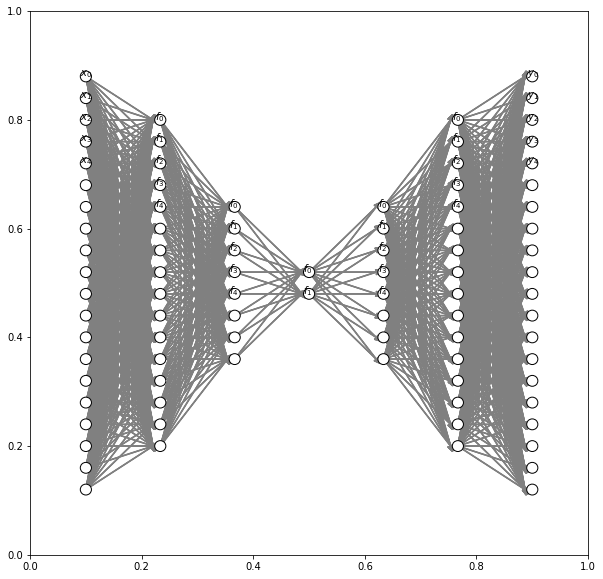

In [73]:
fig = plt.figure(figsize=(10, 10))
draw_neural_net(fig.gca(), .1, .9, .1, .9, [20,16,8,2,8,16,20],random_edge='No')

In [121]:
from keras.layers import Input, Dense
from keras.models import Model

In [122]:
# this is the size of our encoded representations
encoding_dim = 64  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats



input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)


# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)



In [123]:
# this is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(512, activation='relu')(input_img)
encoded = Dense(256, activation='relu')(input_img)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(256, activation='relu')(decoded)
decoded = Dense(512, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)




In [124]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
autoencoder = Model(input_img, decoded)

In [125]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
deco = autoencoder.layers[-4](encoded_input)
deco = autoencoder.layers[-3](deco)
deco = autoencoder.layers[-2](deco)
deco = autoencoder.layers[-1](deco)
# create the decoder model
decoder = Model(encoded_input, deco)

In [126]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [127]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [128]:
# this model maps an input to its reconstruction
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 97us/step - loss: 0.3294 - val_loss: 0.2591
Epoch 2/50
60000/60000 [==============================] - 6s 100us/step - loss: 0.2527 - val_loss: 0.2448
Epoch 3/50
60000/60000 [==============================] - 6s 104us/step - loss: 0.2396 - val_loss: 0.2341
Epoch 4/50
60000/60000 [==============================] - 6s 105us/step - loss: 0.2202 - val_loss: 0.2093
Epoch 5/50
60000/60000 [==============================] - 6s 108us/step - loss: 0.1951 - val_loss: 0.1857
Epoch 6/50
60000/60000 [==============================] - 7s 116us/step - loss: 0.1814 - val_loss: 0.1750
Epoch 7/50
60000/60000 [==============================] - 7s 119us/step - loss: 0.1717 - val_loss: 0.1641
Epoch 8/50
60000/60000 [==============================] - 8s 127us/step - loss: 0.1631 - val_loss: 0.1594
Epoch 9/50
60000/60000 [==============================] - 7s 115us/step - loss: 0.1565 - val_loss: 0.15

In [129]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

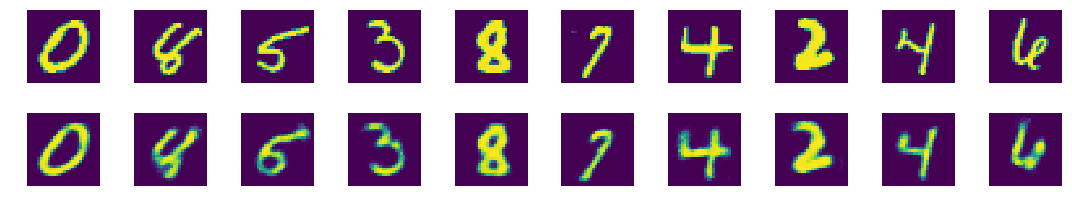

In [130]:
n_examples = 10
fig, axs = plt.subplots(2, n_examples, figsize=(15, 3))
for example_i,ind in enumerate(ind_row_test[:n_examples]):
    axs[0][example_i].imshow(
        np.reshape(test_xs[ind, :], (28, 28)))
    axs[0][example_i].set_axis_off()
    axs[1][example_i].imshow(
            np.reshape([decoded_imgs[ind, :]], (28, 28)))
    axs[1][example_i].set_axis_off()

fig.show()
plt.tight_layout()    

# Main concepts of machine learning
## 1-Measure of fitness/success
* **Least Square Error/Loss Function, Energy Function (Optimization)** 
* **1800-Now**

## 2-How to get better fitness/scores
* **Gradient Descent on a differentiable function (Optimization)**
* **1600-Now: Calculus**
* **Adapting the paramaters/structures of our models**

## 3-How to represent the objects
## 4-Structural Capacity of our Models or the "Storage Capacity" of our models in handling the curse of dimensionality
## 5-Computational graph, which are based on functional spaces (Linear Algebra)

# What is happening from this


0.02


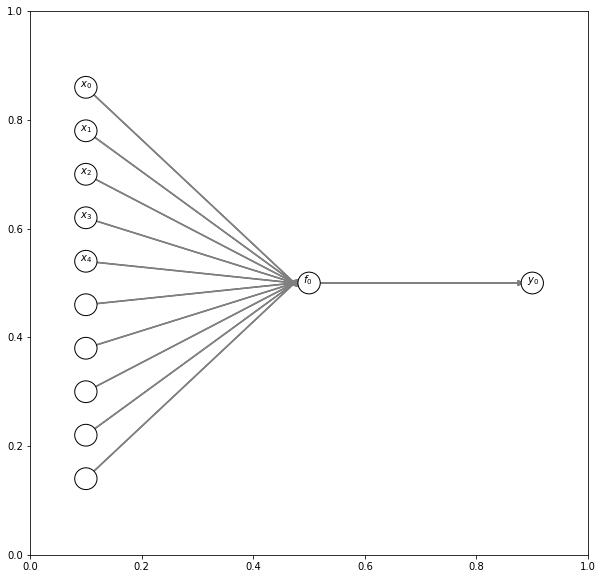

In [86]:
fig = plt.figure(figsize=(10, 10))
draw_neural_net(fig.gca(), .1, .9, .1, .9, [10,1,1],random_edge='No')

# To this: Manifold learning

0.02


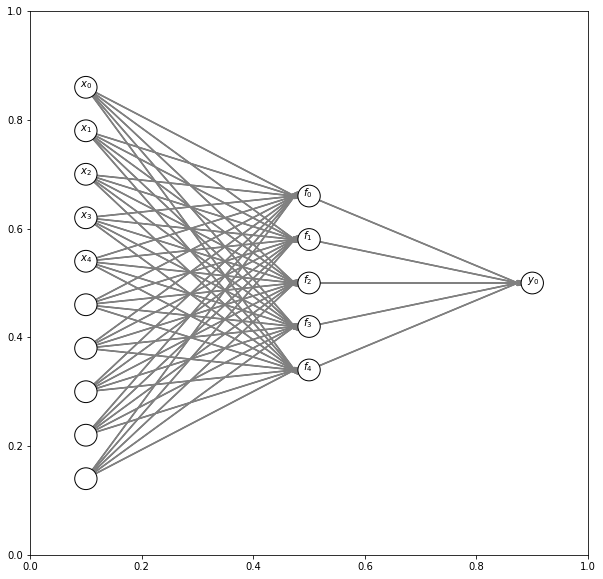

In [87]:
fig = plt.figure(figsize=(10, 10))
draw_neural_net(fig.gca(), .1, .9, .1, .9, [10,5,1],random_edge='No')

# To deep networks

0.02


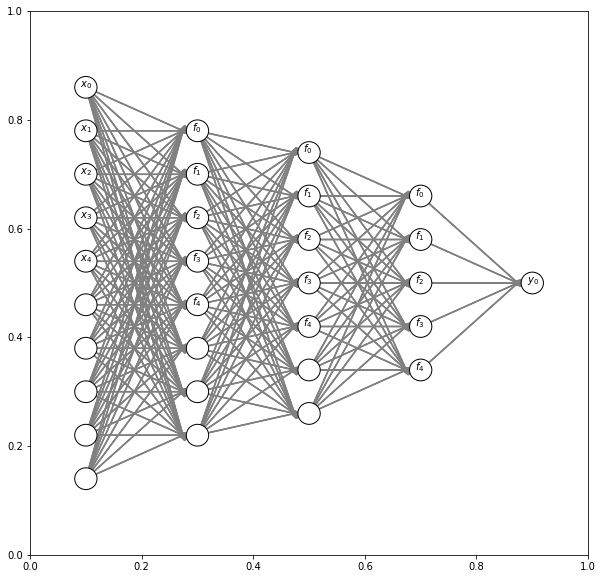

In [88]:
fig = plt.figure(figsize=(10, 10))
draw_neural_net(fig.gca(), .1, .9, .1, .9, [10,8,7,5,1],random_edge='No')

# In terms of representation:
## 1. Polynomial regression is based on a single centralized memory (one node stores everything)
<hr style="height:5px;border:none;color:stillblue;background-color:blue;" />

## 2. Manifold learning is based on distributed centralized memory (several nodes store different things but completely)
<hr style="height:5px;border:none;color:stillblue;background-color:blue;" />

## 3. Deep network is based on distributed memory (all the nodes together store everything, but none of them individually)
<hr style="height:5px;border:none;color:stillblue;background-color:blue;" />

# <a></a>
# <a></a>
# In terms of Storage/Structural capacity
## 1. If polynomial regression is "Addition"
## 2. Manifold learnig is the repetition of addition: "Multiplication"
## 3. And deep network is the repetition of multiplication: "Power (exponential)"
<hr style="height:5px;border:none;color:stillblue;background-color:blue;" />


# Other Extensions
## Denoising Auto-Encoders
## Variational Auto-Encoders

## Convolutional Auto-Encoders



## Can we generate new data sets?

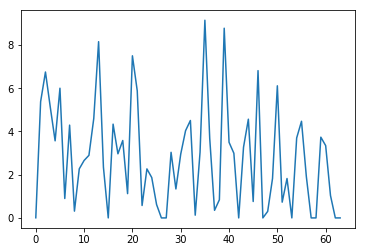

In [164]:
# This is from one of the data sets

## Activatio layer/ embedding vector
plt.plot(encoded_imgs[0])

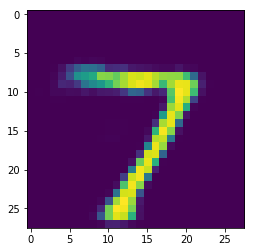

In [165]:
# If we reconstruct it 
random_decoded  = decoder.predict(encoded_imgs[0][np.newaxis,:])
plt.imshow(random_decoded.reshape(28,28))

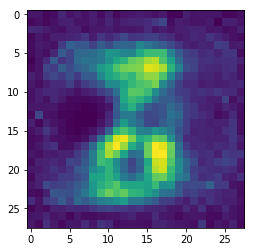

In [171]:
# But if we start from a random vector
# we start from the second half of the network
random_encoded = np.random.randn(1,encoded_imgs.shape[1])
random_decoded  = decoder.predict(random_encoded)
plt.imshow(random_decoded.reshape(28,28))

# Variational Auto-Encoders (VAE)

# How to make the middle layer easy for sampling

### We systematically condition the values of the vector

0.025


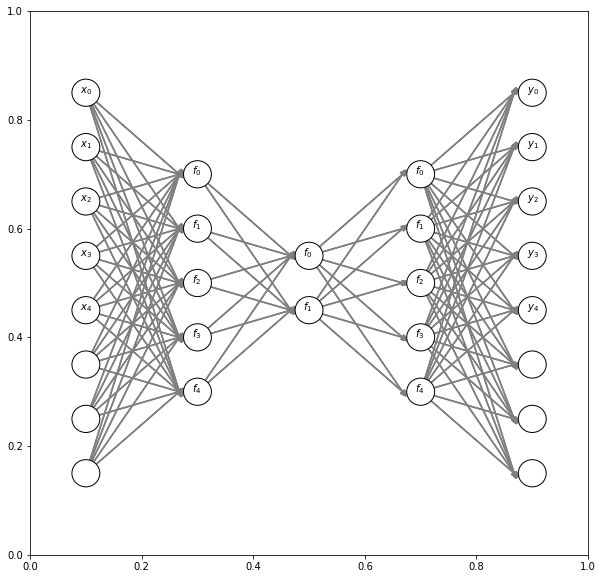

In [172]:

fig = plt.figure(figsize=(10, 10))
draw_neural_net(fig.gca(), .1, .9, .1, .9, [8,5,2,5,8],)

0.025


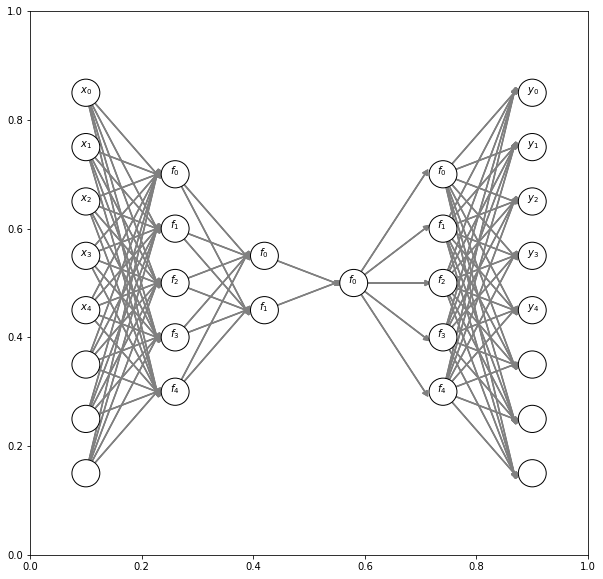

In [155]:
fig = plt.figure(figsize=(10, 10))
draw_neural_net(fig.gca(), .1, .9, .1, .9, [8,5,2,1,5,8],)

![](Images/VAE.png)

In [135]:
# Example from https://github.com/keras-team/keras/blob/master/examples/variational_autoencoder.py

'''This script demonstrates how to build a variational autoencoder with Keras.
 #Reference
 - Auto-Encoding Variational Bayes
   https://arxiv.org/abs/1312.6114
'''
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras import backend as K
from keras import metrics
from keras.datasets import mnist

batch_size = 100
original_dim = 784
latent_dim = 2
intermediate_dim = 256
epochs = 50
epsilon_std = 1.0


x = Input(shape=(original_dim,))
h = Dense(intermediate_dim, activation='relu')(x)
z_mean = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)


def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0.,
                              stddev=epsilon_std)
    return z_mean + K.exp(z_log_var / 2) * epsilon

# note that "output_shape" isn't necessary with the TensorFlow backend
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# we instantiate these layers separately so as to reuse them later
decoder_h = Dense(intermediate_dim, activation='relu')
decoder_mean = Dense(original_dim, activation='sigmoid')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

# instantiate VAE model
vae = Model(x, x_decoded_mean)

# Compute VAE loss
xent_loss = original_dim * metrics.binary_crossentropy(x, x_decoded_mean)
kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
vae_loss = K.mean(xent_loss + kl_loss)

vae.add_loss(vae_loss)
vae.compile(optimizer='rmsprop')
vae.summary()


# train the VAE on MNIST digits
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))




__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           (None, 784)          0                                            
__________________________________________________________________________________________________
dense_31 (Dense)                (None, 256)          200960      input_10[0][0]                   
__________________________________________________________________________________________________
dense_32 (Dense)                (None, 2)            514         dense_31[0][0]                   
__________________________________________________________________________________________________
dense_33 (Dense)                (None, 2)            514         dense_31[0][0]                   
__________________________________________________________________________________________________
lambda_3 (

In [136]:
vae.fit(x_train,
        shuffle=True,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_test, None))


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 72us/step - loss: 189.4970 - val_loss: 171.2252
Epoch 2/50
60000/60000 [==============================] - 4s 67us/step - loss: 169.0454 - val_loss: 167.4560
Epoch 3/50
60000/60000 [==============================] - 4s 73us/step - loss: 165.7329 - val_loss: 164.6511
Epoch 4/50
60000/60000 [==============================] - 4s 71us/step - loss: 163.3982 - val_loss: 162.7818
Epoch 5/50
60000/60000 [==============================] - 4s 73us/step - loss: 161.5695 - val_loss: 161.1372
Epoch 6/50
60000/60000 [==============================] - 5s 77us/step - loss: 160.0790 - val_loss: 160.0200
Epoch 7/50
60000/60000 [==============================] - 5s 76us/step - loss: 158.9517 - val_loss: 159.1301
Epoch 8/50
60000/60000 [==============================] - 5s 81us/step - loss: 158.0574 - val_loss: 158.0810
Epoch 9/50
60000/60000 [==============================] - 5s 79us/step - loss:

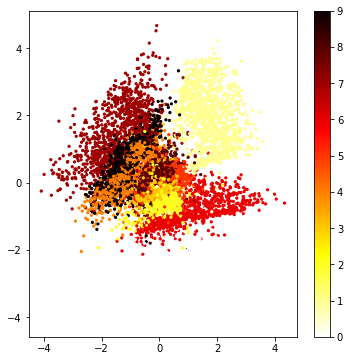

In [137]:
# build a model to project inputs on the latent space
encoder = Model(x, z_mean)

# display a 2D plot of the digit classes in the latent space
x_test_encoded = encoder.predict(x_test, batch_size=batch_size)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1],s=5, c=y_test,cmap=plt.cm.hot_r)
plt.colorbar()
plt.show()

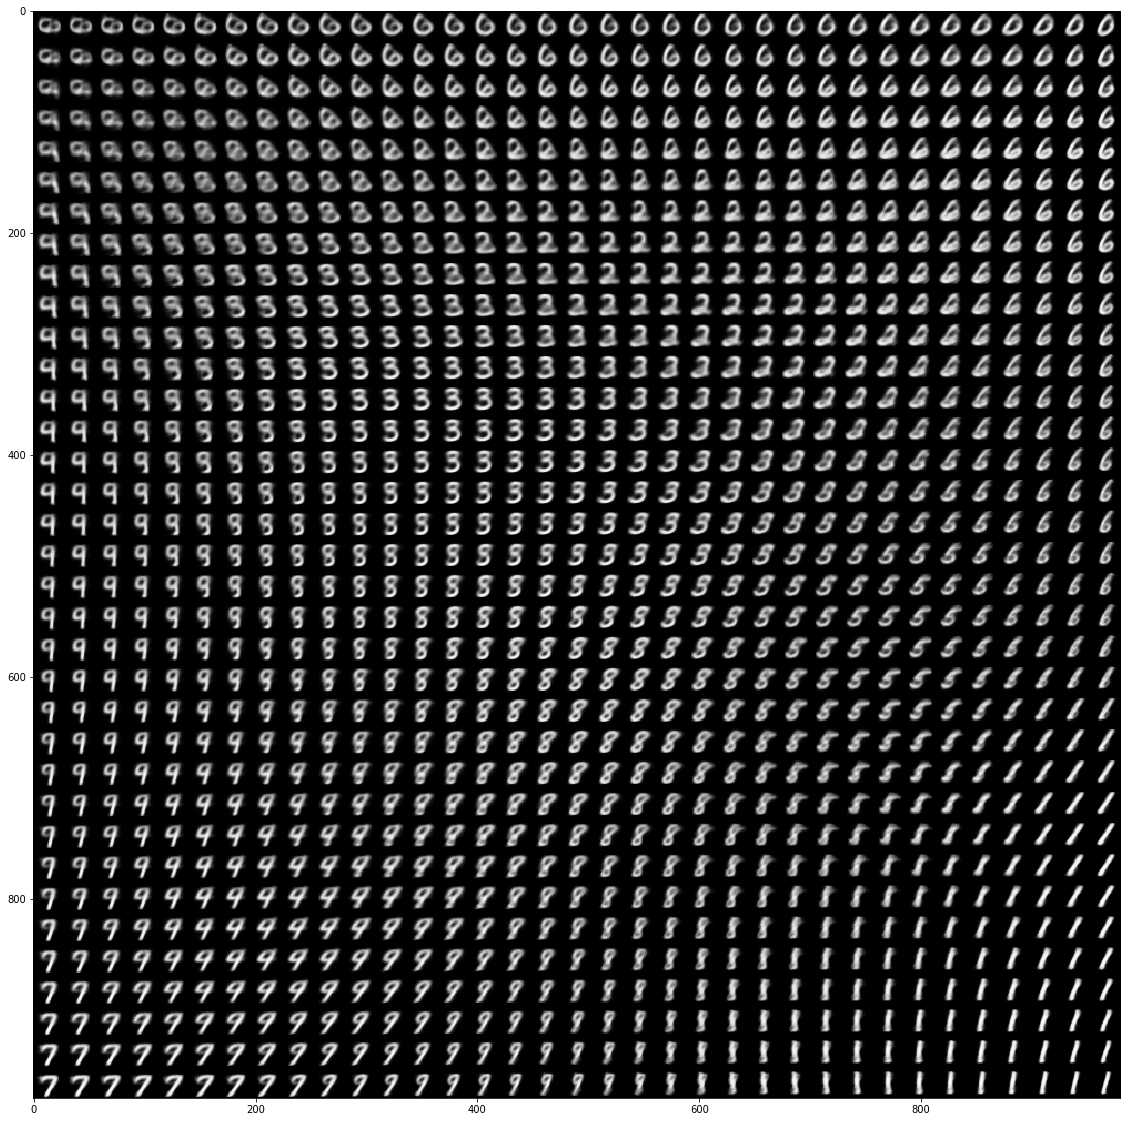

In [173]:
# build a digit generator that can sample from the learned distribution
decoder_input = Input(shape=(latent_dim,))
_h_decoded = decoder_h(decoder_input)
_x_decoded_mean = decoder_mean(_h_decoded)
generator = Model(decoder_input, _x_decoded_mean)

# display a 2D manifold of the digits
n = 35  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# linearly spaced coordinates on the unit square were transformed through the inverse CDF (ppf) of the Gaussian
# to produce values of the latent variables z, since the prior of the latent space is Gaussian
grid_x = norm.ppf(np.linspace(0.05, 0.95, n))
grid_y = norm.ppf(np.linspace(0.05, 0.95, n))

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = generator.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(20, 20))
plt.imshow(figure, cmap='Greys_r')
plt.show()

In [174]:
# build a digit generator that can sample from the learned distribution
decoder_input = Input(shape=(latent_dim,))
_h_decoded = decoder_h(decoder_input)
_x_decoded_mean = decoder_mean(_h_decoded)
generator = Model(decoder_input, _x_decoded_mean)


def generate_vis(x,y):
    fig = plt.figure(figsize=(7,7))
    x = norm.ppf(x)
    y = norm.ppf(y)
    z_sample = np.array([[x, y]])
    x_decoded = generator.predict(z_sample)
    digit = x_decoded[0].reshape(digit_size, digit_size)
    plt.imshow(digit,cmap='Greys_r')
    plt.show()
interact(generate_vis,x=(0.05, 0.95, .01),y=(0.05, 0.95, .01))

interactive(children=(FloatSlider(value=0.49, description='x', max=0.95, min=0.05, step=0.01), FloatSlider(value=0.49, description='y', max=0.95, min=0.05, step=0.01), Output()), _dom_classes=('widget-interact',))

<function __main__.generate_vis>

# Further topics
## Convolutional Neural Networks
### When we have homogeneous data sets like images/texts/ audio, video,graphs,...


![](Images/CNN_Dog.png)


# Architecture of computational graph is the key!!

# Now other architectures are also easily available

## For example, with a bit of change we have multi-layer perceptrons for prediction

## And this is beyond classical divisions such as supervised, unsupervised,...
## We just need to define "What" we want!



0.01


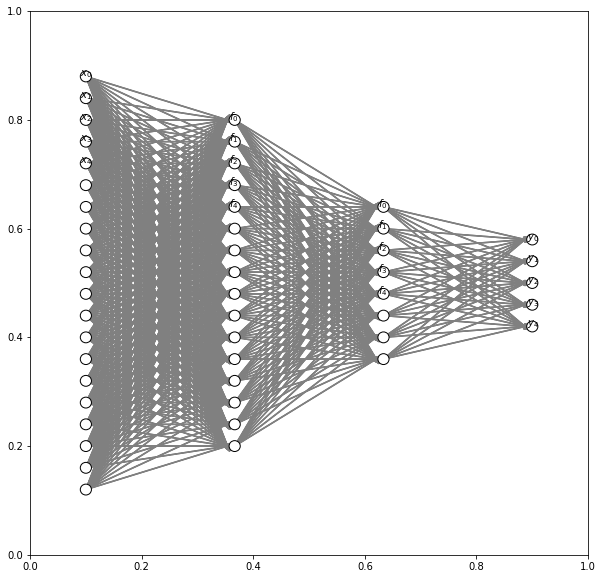

In [149]:

fig = plt.figure(figsize=(10, 10))
draw_neural_net(fig.gca(), .1, .9, .1, .9, [20,16,8,5],)